Ce *notebook* vise à présenter quelques éléments généraux sur l'environnement *R* appelé [tidyverse](https://www.tidyverse.org/). Le *tidyverse* est généralement présenté comme une suite de paquets *R* &#x2013; on retrouve souvent le terme d'écosystème &#x2013; qui partagent un mode de fonctionnement similiaire et une pensée commune vis-à-vis de la façon de manipuler des données et des les analyser avec *R*. Les principaux paquets constitutifs du *tidyverse* sont `readr`, `dplyr`, `tidyr`, `purrr`, `tibble`, `stringr`, `forcats`, `ggplot2`, mais il en existe d'autres qui viennent se greffer à ce noyau initial comme [lubridate](https://cran.r-project.org/web/packages/lubridate/index.html), [modelr](https://github.com/tidyverse/modelr) ou [broom](https://github.com/tidymodels/broom). 

Cette notion de *tidyverse* est introduite en 2016 par Hadley Wickham lors de la [conférence UseR!](https://channel9.msdn.com/Events/useR-international-R-User-conference/useR2016/Towards-a-grammar-of-interactive-graphics?ocid=player). H. Wickham est un *data scientist* qui s'était avant cela illustré par le développement de paquets *R* bien connu comme `ggplot` et qui au-delà de l'écosystème de paquets a mené une réflexion de fond sur la structuration des données dans le contexte d'une analyse statistique. Ses recherches ont fait l'objet d'une publication en 2014 dans le [Journal of Statiscal Software](https://www.jstatsoft.org/article/view/v059i10), on y retrouve notamment l'idée très proche des trois premières formes normales de Codd selon laquelle chaque variabe doit constituer une colonne, chaque observation une ligne et que chaque tabeau doit posséder une certaine unité dans le type d'observations qu'il contient.

Il est aussi important de noter que Hadley Wickham est directeur scientifique au sein de l'entreprise [RStudio](https://www.rstudio.com/) qui développe notamment le l'environnement de développement du même nom. Cela contribue à expliquer l'important succès du *tidyverse* dont de nombreuses composantes sont développées et promues par l'entreprise *RStudio* (ce qui ne retire rien au caractère *open source* de ces paquets). Depuis 2016 le metapaquet [tidyverse](https://cran.r-project.org/web/packages/tidyverse/) a ainsi été téléchargé près de 27 millions de fois sur *CRAN*. De très nombreuses ressources en ligne ou manuels sont ainsi désormais entièrement écrits à partir de la logique *tidyverse*.

Malgré son succès, cette démarche ne fait pas toujours l'unanimité. On lui reproche parfois de [rendre l'apprentissage de *R* plus complexe](https://github.com/matloff/TidyverseSkeptic) en masquant les fonctionnalités natives au profit de celles du *tidyverse*, d'entraîner des pertes de performances, [de nécessité le chargement de trop de paquets pour réaliser des opérations élémentaires](https://github.com/matloff/TidyverseSkeptic), etc.

Comme toujours il semble donc nécessaire de prendre du recul par rapport aux outils utilisés et se documenter non pas seulement sur leur fonctionnement, mais aussi sur ce qui entoure leur production. L'enjeu ne semble pas être de choisir de n'utiliser que le *tidyverse* ou bien que les fonctionnalités natives de *R* et quelques autres paquets, mais d'être capable de naviguer entre ces différentes ressources selon les besoins de la recherche.

Afin de découvrir le *tidyverse*, nous allons ici prendre l'exemple de données à l'échelle départementale pour la france des années 1830 qui se prêtent à la fois à des analyses quantitatives et à des représentations cartographiques. Ces chiffres proviennent de sources classiques comme l'enquête d'André-Michel Guerry de 1833 sur la statistique morale de la France ou bien l'essai d'Adolphe Angeville sur la statistique de la population française de 1836.

Nous emploierons un fond de carte est au format *shapefile* produit à partir des fichiers diffusés par Frédéric Salmon sur son site [http://fondsdecarte.free.fr/](http://fondsdecarte.free.fr/).

Il est également possible de retrouver ces données et des fonds de carte adaptés dans paquets *R* comme [Guerry](https://cran.r-project.org/web/packages/Guerry/) ou bien [HistData](https://cran.r-project.org/web/packages/HistData/).



## Importation des données



Nous allons commencer par utiliser le paquet [readr](https://cran.r-project.org/web/packages/readr/) afin de charger le fichier CSV contenant les données :



In [1]:
library(readr)
data <- read_csv2("data/data_france_1830.csv")

ℹ Using ',' as decimal and '.' as grouping mark. Use `read_delim()` for more control.


── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  DEPT = col_double(),
  Departement = col_character(),
  Agriculteurs = col_double(),
  Industriels = col_double(),
  Ecoliers = col_double(),
  Esperance_de_vie = col_double(),
  Densite_industrie = col_double(),
  Pauperisme = col_double()
)




Le paquet `readr` fait partie de l'environnement `tidyverse`,  à l'aide de la fonction `str()` on constate que la fonction `read_csv2()` crée un objet de type `tibble` :



In [2]:
str(data)

tibble [86 × 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ DEPT             : num [1:86] 1 2 3 4 5 7 8 9 10 11 ...
 $ Departement      : chr [1:86] "Ain" "Aisne" "Allier" "Basses-Alpes" ...
 $ Agriculteurs     : num [1:86] 706 288 601 679 733 763 309 685 408 601 ...
 $ Industriels      : num [1:86] 99 495 179 159 81 126 337 163 309 204 ...
 $ Ecoliers         : num [1:86] 39 78 12 45 76 31 94 26 91 32 ...
 $ Esperance_de_vie : num [1:86] 34.9 37.5 32.3 31.9 31.7 36.5 38.9 38.5 36.4 37.6 ...
 $ Densite_industrie: num [1:86] 5.3 7.3 6.5 5.1 3 9.4 10.5 6.8 4.7 9.4 ...
 $ Pauperisme       : num [1:86] 8 35 3 11 8 14 13 16 6 17 ...
 - attr(*, "spec")=
  .. cols(
  ..   DEPT = col_double(),
  ..   Departement = col_character(),
  ..   Agriculteurs = col_double(),
  ..   Industriels = col_double(),
  ..   Ecoliers = col_double(),
  ..   Esperance_de_vie = col_double(),
  ..   Densite_industrie = col_double(),
  ..   Pauperisme = col_double()
  .. )


Un `tibble` est un format d'objet imaginé pour remplacer les `data.frames` traditionnellement utilisés dans *R*. Si vous savez ce qu'est un `data.frame` vous savez déjà ce qu'est un `tibble` et il est très facile de passer à l'un ou l'autre de ces formats !

Quel est alors l'intérêt des `tibbles` ? Leurs développeurs ont cherché à créer un format de `data.frame` moins complexe et plus facile à manipuler, l'objet de ce *notebook* n'est pas de détailler ces aspects mais le chapitre intitulé [Tibbles](https://r4ds.had.co.nz/tibbles.html) du manuel *R for Data Science* constitue une très bonne synthèse sur le sujet. Notons toutefois que les `tibbles` sont conçus selon la structure de données dite *tidy data* évoquée dans l'introduction.



In [3]:
data

DEPT,Departement,Agriculteurs,Industriels,Ecoliers,Esperance_de_vie,Densite_industrie,Pauperisme
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Ain,706,99,39,34.9,5.3,8
2,Aisne,288,495,78,37.5,7.3,35
3,Allier,601,179,12,32.3,6.5,3
4,Basses-Alpes,679,159,45,31.9,5.1,11
5,Hautes-Alpes,733,81,76,31.7,3.0,8
7,Ardeche,763,126,31,36.5,9.4,14
8,Ardennes,309,337,94,38.9,10.5,13
9,Ariege,685,163,26,38.5,6.8,16
10,Aube,408,309,91,36.4,4.7,6


En appelant l'objet `data`, les 10 premières lignes s'affichent dans la console (évitant ainsi de la surchager d'informations) et nous pouvons identifier les différents colonnes disponibles ainsi que les formats de données qui y ont été associés lors de l'importation avec `readr`. En l'occurrence nous avons ici quasi exclusivement des valeurs numériques, seule la colonne *Departement* est de type alphabétique.



## Examinons les différentes variables disponibles



Nous allons maintenant utiliser d'autres paquets du `tidyverse` afin de manipuler notre tableau de données : [dplyr](https://cloud.r-project.org/web/packages/dplyr/index.html), [purrr](https://cloud.r-project.org/web/packages/purrr/index.html) et [tidyr](https://cloud.r-project.org/web/packages/tidyr/index.html).

Le paquet `dplyr` permet de manipuler des données tabulaires à l'aide de quelques fonctions principales : `filter()` et `select()` pour sélectionner respectivement des lignes et des colonnes, `mutate()` pour modifier ou créer de nouvelles colonnes, `group_by()` pour regrouper des données et  `summarise()` pour appliquer des fonctions mathématiques (dénombrement, moyenne, écart-type, etc.) à des données regroupées.

Le paquet `purrr` offre pour sa part des la possibilité d'appliquer des fonctions sur des vecteurs, son usage permet notamment d'éviter d'écrire des boucles lorsque l'on cherche à répéter une opération sur une série de valeurs ou d'objets.

Nous avons constaté que les variables de notre tableau étaient presque toutes quantitatives, nous allons donc chercher à analyser leurs distributions respectives à travers un histrogramme de la distribution de chacune d'entre-elles :




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



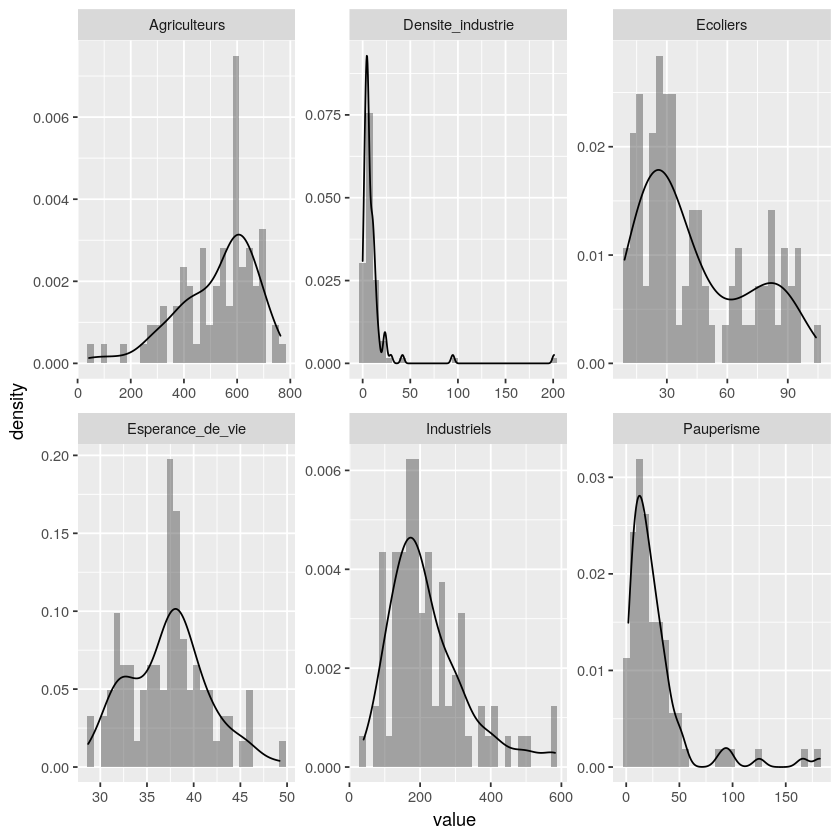

In [4]:
library(dplyr)
library(purrr)
library(tidyr)

library(ggplot2)

data %>%
  select(-DEPT) %>%
  keep(is.numeric) %>% 
  gather("key", "value") %>% 
  ggplot(aes(value)) +
  facet_wrap(~ key, scales = "free") +
  geom_histogram(aes(y=..density..), alpha=0.5, 
                 position="identity")  +
  geom_density(alpha=0.5)

Avant d'expliquer les fonctions présentes, nous devons parler de l'opérateur `%>%` utilisé ci-dessus. Il s'agit de ce qu'on appelle un `pipe` fourni par le paquet [magrittr](https://cloud.r-project.org/web/packages/magrittr/index.html), cet opérateur permet d'enchaîner des opérations les unes à la suite des autres, de créer une sorte de flux entre le jeu de données initial et le résultat final escompté.

Ici nous commençons donc par partir de notre `tibble` intitulé ici `data`, puis nous utilisons la fonction `select()` du paquet `dplyr` afin d'exclure la colonne *DEPT* qui contient le numéro identifiant chaque département. Nous utilison ensuite la fonction `keep()` du paquet `purrr` afin de ne sélectionner que les colonnes au format numériques (*DEPT* étant donc exclue), puis la fonction `gather()` dont nous expliquerons le rôle dans un tout petit instant.

Afin de produire les graphiques des distributions nous utilisons le paquet [ggplot2](https://cloud.r-project.org/web/packages/ggplot2/index.html) qui fournit de nombreuses fonctions de visualisations de données selon les principes développés par Leland Wilkinson dans son ouvrage *The Grammar of Graphics* (1993).
L'objet n'est pas ici de détailler le fonctionnement de `ggplot2,` car de très nombreuses ressources existent en ligne, mais attardons-nous tout de même sur la fonction `facet_wrap(`)= qui permet de diviser un graphique en plusieurs panneaux (c'est l'idée d'une grille, d'où le terme de *grid* souvent employé dans les ressources anglophones). L'idée étant ici de produire sur le même graphique une vignette par variables quantitatives à analyser. Cette fonction attend deux variables : une indiquant comment découper les panneux et une autre contenant les données à tracer sur le graphique. Mais dans notres cas nous avons six variables à traiter, ce qui n'est pas directement compatible avec la fonction `facet_wrap()`&hellip;

D'où le recours à la fonction `gather()` issue du paquet `tidyr` qui permet de transformer une sélection de plusieurs colonnes (nos 6 variables donc) en seulement deux : `key` qui contient le nom des colonnes d'origine et `value` qui contient les données des colonnes en question. Via la fonction `gather()` nous soumettons donc un jeu de données que `ggpplot2` est capable de traiter avec la fonction `facet_wrap()`.

Ces représentations graphiques peuvent bien sûr être accompagnées de résumés statistiques pour préciser l'analyse :



In [5]:
library(skimr)
data %>%
  select(-DEPT) %>%
  keep(is.numeric) %>%
  skim()

── Data Summary ────────────────────────
                           Values    
Name                       Piped data
Number of rows             86        
Number of columns          6         
_______________________              
Column type frequency:               
  numeric                  6         
________________________             
Group variables            None      

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable     n_missing complete_rate  mean     sd    p0   p25    p50
1 Agriculteurs              0             1 526.  147.    43   433   573   
2 Industriels               0             1 221.  110.    40   143.  190.  
3 Ecoliers                  0             1  43.3  26.7    9    24    33   
4 Esperance_de_vie          0             1  37.3   4.24  28.7  33.8  37.6 
5 Densite_industrie         0             1  11.2  23.7    0     4     5.65
6 Pauperisme                0             1  27.4  31.3    2    10.2  19   
   

Nous avons ici recours au paquet [skmir](https://cran.r-project.org/web/packages/skimr/index.html) pensé comme une alternative plus moderne à la fonction `summary()` traditionnelle de *R*. De plus, `skmir` a été développé afin de fonctionner parfaitement avec les principes du *tidyverse.*



## Produire des cartes



Il existe plusieurs façons de réaliser des cartes choroplèthes en utilisant R, ce *notebook* en présente une avec `ggplot2`, mais il serait par exemple possible d'utiliser le paquet [cartography](https://cran.r-project.org/web/packages/cartography/) développé par des [géomaticiens du CNRS](https://riate.cnrs.fr/).

Afin de produire nos cartes, nous allons charger le paquet [sf](https://cloud.r-project.org/web/packages/sf/) qui permet de manipuler des données spatiales comme des fonds de carte au format *shapefile* dans *R*.

Du côté de `ggplot2`, la fonction `geom_sf()` permet de traiter les données spatiales et fonctionne de concert avec le paquet `sf` :



Linking to GEOS 3.6.2, GDAL 2.2.3, PROJ 4.9.3



Reading layer `1815dpts_S' from data source `/home/leo/Bureau/carto_R/data/shapefile/1815dpts_S.shp' using driver `ESRI Shapefile'
Simple feature collection with 87 features and 1 field
geometry type:  POLYGON
dimension:      XY
bbox:           xmin: 20 ymin: 30 xmax: 620 ymax: 601.0369
CRS:            NA


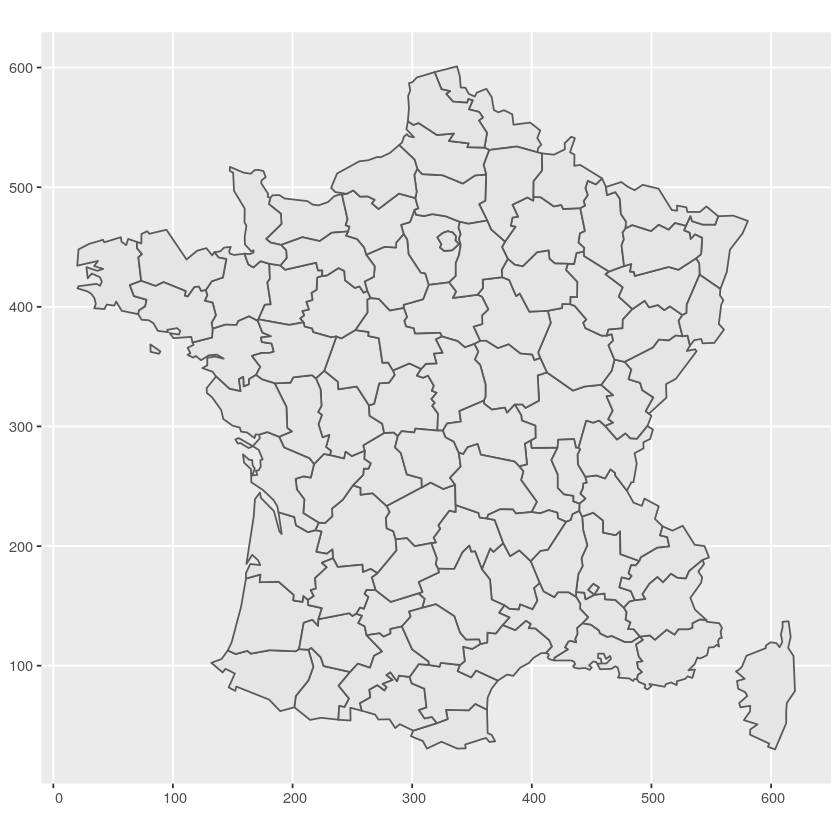

In [6]:
library(sf)

france <- st_read("data/shapefile/1815dpts_S.shp")

ggplot(france) + geom_sf()

Ci-dessus nous avons donc chargé le fond de carte dans un objet `france` à l'aide de la fonction `st_read()`, puis nous pouvons projeter le fond de carte à l'aide de `ggplot` et de `geom_sf`.

Afin de produire des [cartes choroplèthes](http://www.hypergeo.eu/spip.php?article274) sur celui-ci, nous avons besoin de réaliser une jointure entre notre *shapefile* et notre tableau de données contenu dans le `tibble` intitulé `data`. Le paquet `dplyr` offre des fonctions de jointure très commodes, ici nous utiliserons `left_join`. Avant d'y avoir recours, il faut toutefois nous assurer de la compatibilité de nos deux `data.frames` :



In [7]:
glimpse(france)

glimpse(data)

Rows: 87
Columns: 2
$ IDEN     <fct> 84, 13, 26, 42, 59, 78, 75, 14, 66, 09, 65, 64, 11, 40, 34, …
$ geometry <POLYGON> POLYGON ((483.5876 119.7497..., POLYGON ((477.6877 119.7…
Rows: 86
Columns: 8
$ DEPT              <dbl> 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,…
$ Departement       <chr> "Ain", "Aisne", "Allier", "Basses-Alpes", "Hautes-A…
$ Agriculteurs      <dbl> 706, 288, 601, 679, 733, 763, 309, 685, 408, 601, 7…
$ Industriels       <dbl> 99, 495, 179, 159, 81, 126, 337, 163, 309, 204, 99,…
$ Ecoliers          <dbl> 39, 78, 12, 45, 76, 31, 94, 26, 91, 32, 23, 32, 46,…
$ Esperance_de_vie  <dbl> 34.9, 37.5, 32.3, 31.9, 31.7, 36.5, 38.9, 38.5, 36.…
$ Densite_industrie <dbl> 5.3, 7.3, 6.5, 5.1, 3.0, 9.4, 10.5, 6.8, 4.7, 9.4, …
$ Pauperisme        <dbl> 8, 35, 3, 11, 8, 14, 13, 16, 6, 17, 10, 125, 23, 9,…


En comparant les sorties de ces deux appels de la fonction `glimpse()` (cette fonction du paquet `tibble` permet d'afficher un extrait d'un `data.frame`), on remarque donc qu'il existe à la fois dans l'objet `france` et dans l'objet `data` un colonne pouvant servir de pivot afin de mettre en place une jointure entre les deux ensembles : `DEPT` dans `data` et `IDEN` dans `france`.

Mais si l'on regarde attentivement les types respectifs de ces deux colonnes, on constate une difficulté : la colonne `IDEN` est en effet un `Factor` (un type de vecteur qui prend des valeurs dans un ensemble fini) et la colonne `DEPT` est au format `col_double()` (des nombres, mais pas nécessairement entiers). Il faut donc d'abord convertir la colonne `IDEN` dans un format numérique, pour ce faire nous utilisons la fonction `mutate` du paquet `dplyr` qui permet de créer ou modifier des colonnes.

Une fois la transformation réalisée, il n'y a plus qu'à utiliser la fonction `left_join()` pour créer la jointure en déclarant l'égalité entre les deux colonnes pivots :



In [8]:
france <- france %>%
  mutate(`IDEN`=as.numeric(`IDEN`))

france <- france %>%
  left_join(., data, by=c("IDEN"="DEPT"))

Sur le modèle de ce que nous avons fait plus haut avec les histrogrammes, nous pourrions créer une grille contenant autant de cartes que nous avons de variables quantitatives :



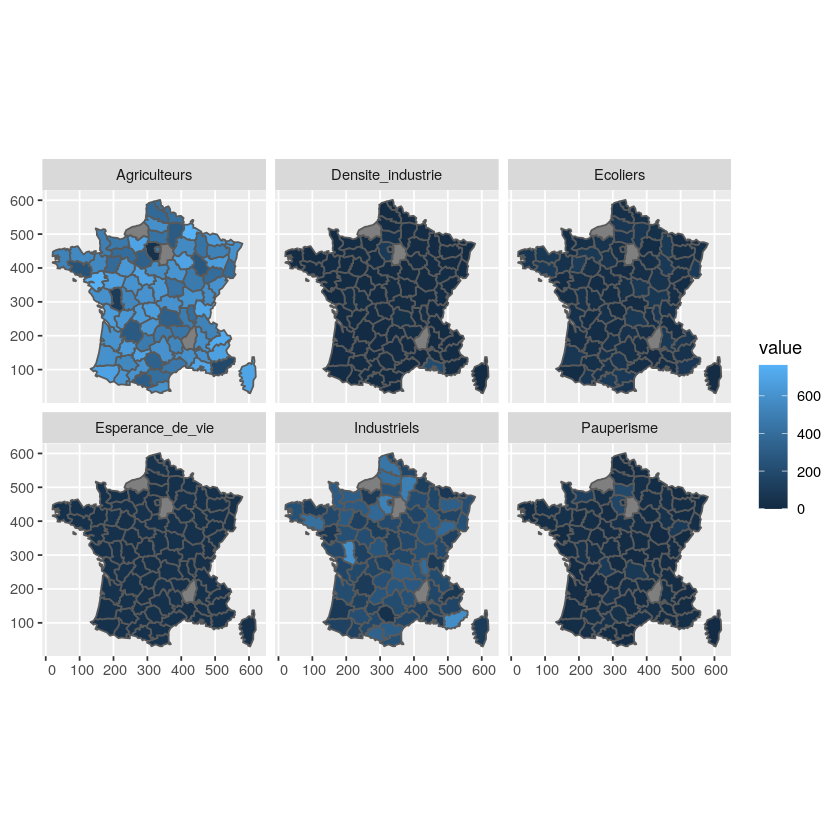

In [9]:
france %>%
  select(-IDEN) %>%
  keep(is.numeric) %>% 
  gather("key", "value", -geometry) %>% ggplot() +
  geom_sf(aes(fill = value)) +
  facet_wrap(~ key)

Mais comme vous pouvez le constatez, le résutat n'est pas très satisfaisant ! Le principe de la fonction `facet_wrap()` étant de ne créer qu'une seule légende pour tous les graphiques projetés, nous nous retrouvons ici avec des discrétisations tout à fait inopérentes pour nos différentes cartes.

Nous allons donc procéder autrement en construisant nos cartes une à une. Prenons le cas d'une carte représentant la variable `Pauprisme` et une autre représentant la variable `Densite_industrie`.

Commençons à l'aide du paquet [classInt](https://cloud.r-project.org/web/packages/classInt/) par discrétiser nos deux variables avec la méthode de Jenks qui en permettant de maximiser la variance inter-classe et de minimiser la variance intra-classe est plutôt bien adaptée à des variables dyssimétriques comme celles qui nous concernent ici :



In [10]:
library(classInt)

jenksPauperisme <- classIntervals(france$Pauperisme, n = 5, style = "jenks")

jenksIndustries <- classIntervals(france$Densite_industrie, n = 5, style = "jenks")

Warning message in classIntervals(france$Pauperisme, n = 5, style = "jenks"):
“var has missing values, omitted in finding classes”
Warning message in classIntervals(france$Densite_industrie, n = 5, style = "jenks"):
“var has missing values, omitted in finding classes”


La fonction `classIntervals()` renvoie notamment une liste contenant les limites des classes identifiées par l'aglorithme de jenks que nous allons pouvoir réemployer via `jenksEcoliers$brks`.

Il n'y alors plus qu'à réutiliser ces différents éléments dans une instruction `ggplot2`, d'abord pour la carte du paupérisme :



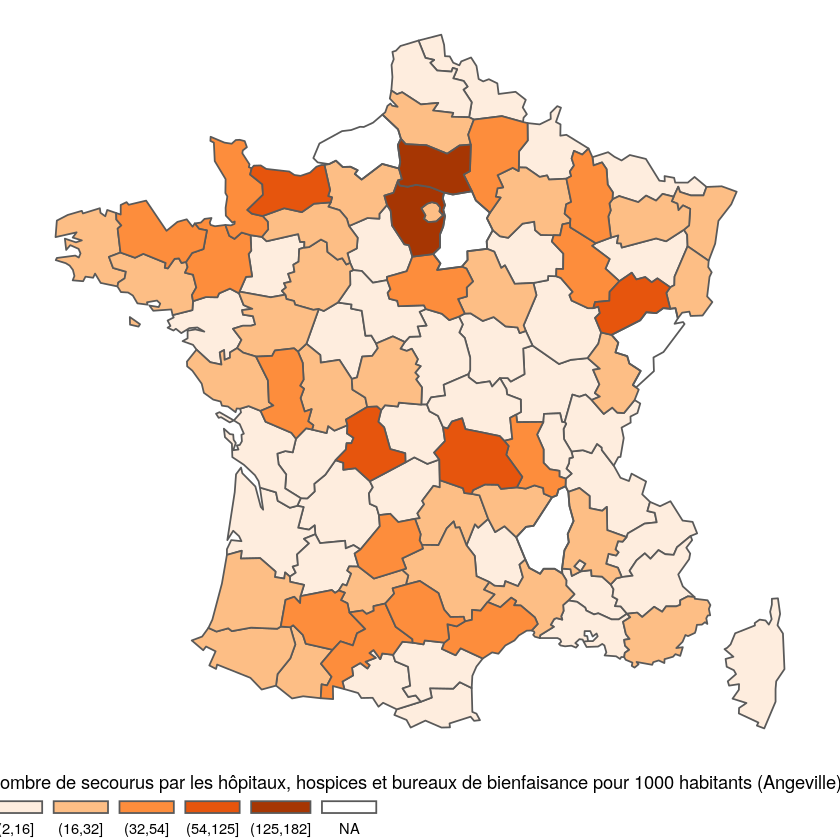

In [11]:
pauperisme <- ggplot() + 
    geom_sf(data = france, aes(fill = cut(Pauperisme, breaks = jenksPauperisme$brks))) + 
    scale_fill_brewer(
      palette = "Oranges",
      direction = 1,
      name= "Nombre de secourus par les hôpitaux, hospices et bureaux de bienfaisance pour 1000 habitants (Angeville)",
      guide = guide_legend(
        keyheight = unit(3, units = "mm"),
        keywidth=unit(12, units = "mm"),
        label.position = "bottom",
        title.position = 'top',
        nrow=1) ) +
    theme_void() +
    theme(legend.position = "bottom")

pauperisme

Puis pour la carte de la densité des industries :



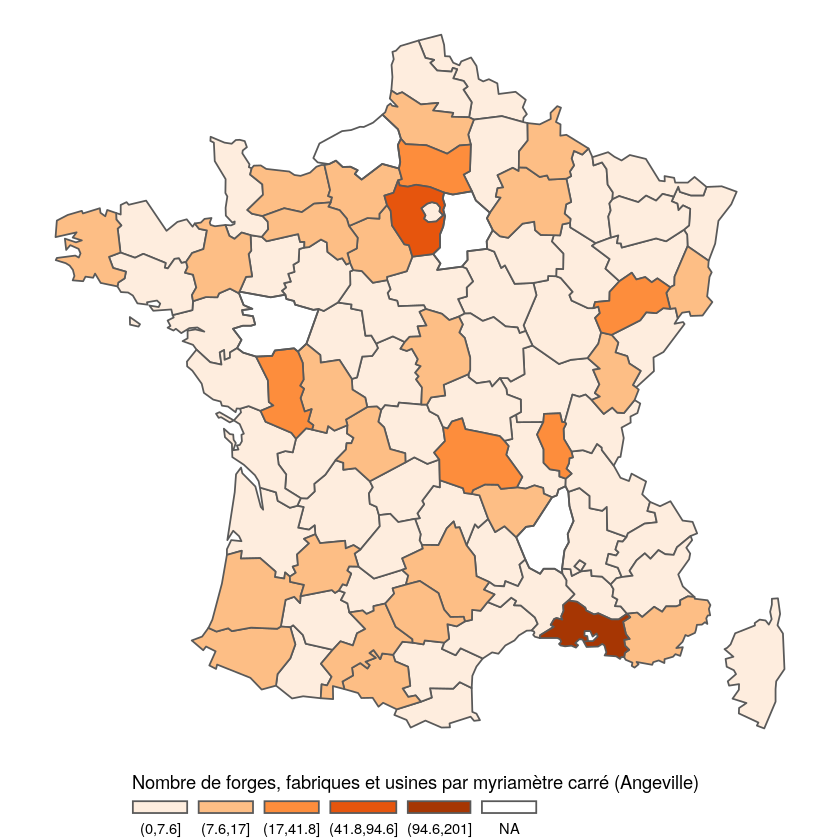

In [12]:
dens_industrie <- ggplot() + 
    geom_sf(data = france, aes(fill = cut(Densite_industrie, breaks = jenksIndustries$brks))) + 
    scale_fill_brewer(
      palette = "Oranges",
      direction = 1,
      name= "Nombre de forges, fabriques et usines par myriamètre carré (Angeville)",
      guide = guide_legend(
        keyheight = unit(3, units = "mm"),
        keywidth=unit(12, units = "mm"),
        label.position = "bottom",
        title.position = 'top',
        nrow=1) ) +
    theme_void() +
    theme(legend.position = "bottom")

dens_industrie

Si l'on souhaite retrouver une organisation par vignette, il est possible d'utilser le paquet [cowplot](https://cloud.r-project.org/web/packages/cowplot/) afin de combiner plusieurs cartes sur le même graphique :



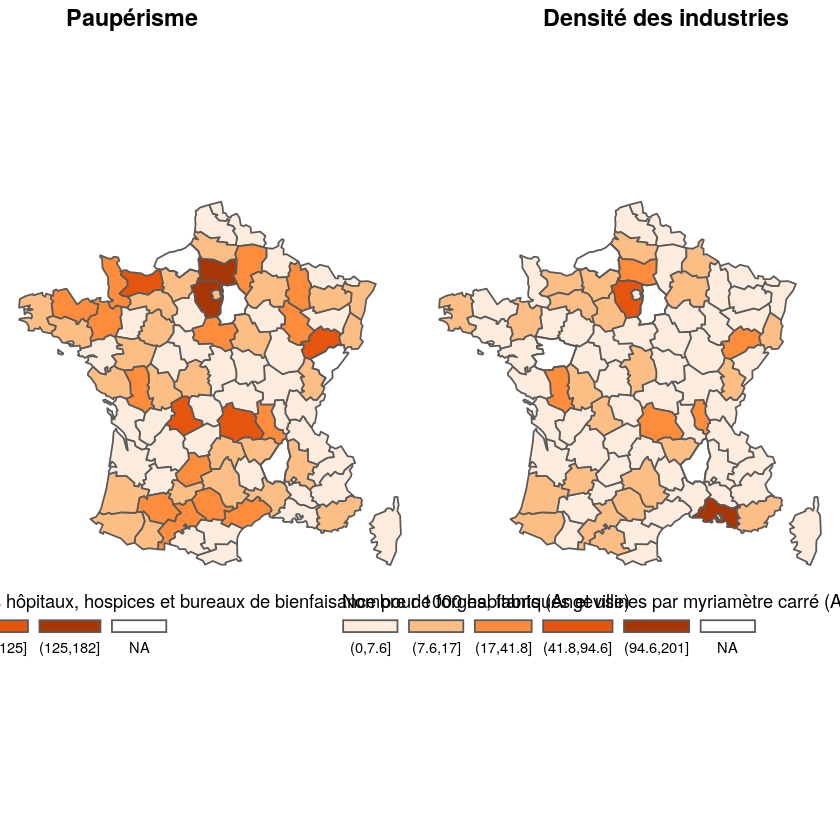

In [13]:
library(cowplot)

plot_grid(pauperisme, dens_industrie, labels=c("Paupérisme", "Densité des industries"), ncol = 2, nrow = 1)

## Ressources



Le billet de lancement de l'environnement *tidyverse* publié en septembre 2016 sur le [blog RStudio](https://blog.rstudio.com/2016/09/15/tidyverse-1-0-0/).

Le manuel de référence sur *tidyverse* est celui de Hadley Wickham et Garret Grolemund : *R for Data Science. Visualize, Model, Transform, Tidy And Import Data*, il est lisible en [ligne](https://r4ds.had.co.nz/index.html), mais a aussi été publié en format papier chez O'Reilley en 2017. À noter qu'il existe une traduction française de ce manuel publiée en 2018 chez [Eyrolles](https://www.eyrolles.com/Informatique/Livre/r-pour-les-data-sciences-9782212675719/).

Autre manuel d'introduction à *R* et au *tidyverse* en français, celui de [Julien Barnier](https://juba.github.io/tidyverse/index.html).

Les [manuels](https://mtes-mct.github.io/parcours-r/) en ligne du pôle ministériel des référents R du ministère de la Transition écologique constituent également des introductions commodes en français.

En ce qui concerne plus directement `ggplot2`, on peut mentionner en français les fiches disponibles sur le site [STHDA](http://www.sthda.com/french/wiki/ggplot2) maintenu par Alboukadel Kassambara ou bien encore l'[introduction plus générale](http://perso.ens-lyon.fr/lise.vaudor/Supports_formation/anciens_supports/Graphiques_ggplot2.html) de Lise Vaudor.

Pour les questions cartographiques, toujours en français, il y a la manuel de Maël Theulière, [Les données spatiales avec R](https://maeltheuliere.github.io/rspatial/index.html).

